In [ ]:
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Printf
using StatsBase

In [1]:
# Create data set

# number of samples
N = 30

# input values
z = collect(range(-2*pi,2*pi, length=N)) + 0.2 * randn(N)

# output function
f = z_ -> 2 * sin.(0.5*z_) + .5 * sin.(3*z_)

# add noise
fn = z_ -> f(z_) + 0.25 * randn(length(z_))

# training data
y = fn(z);

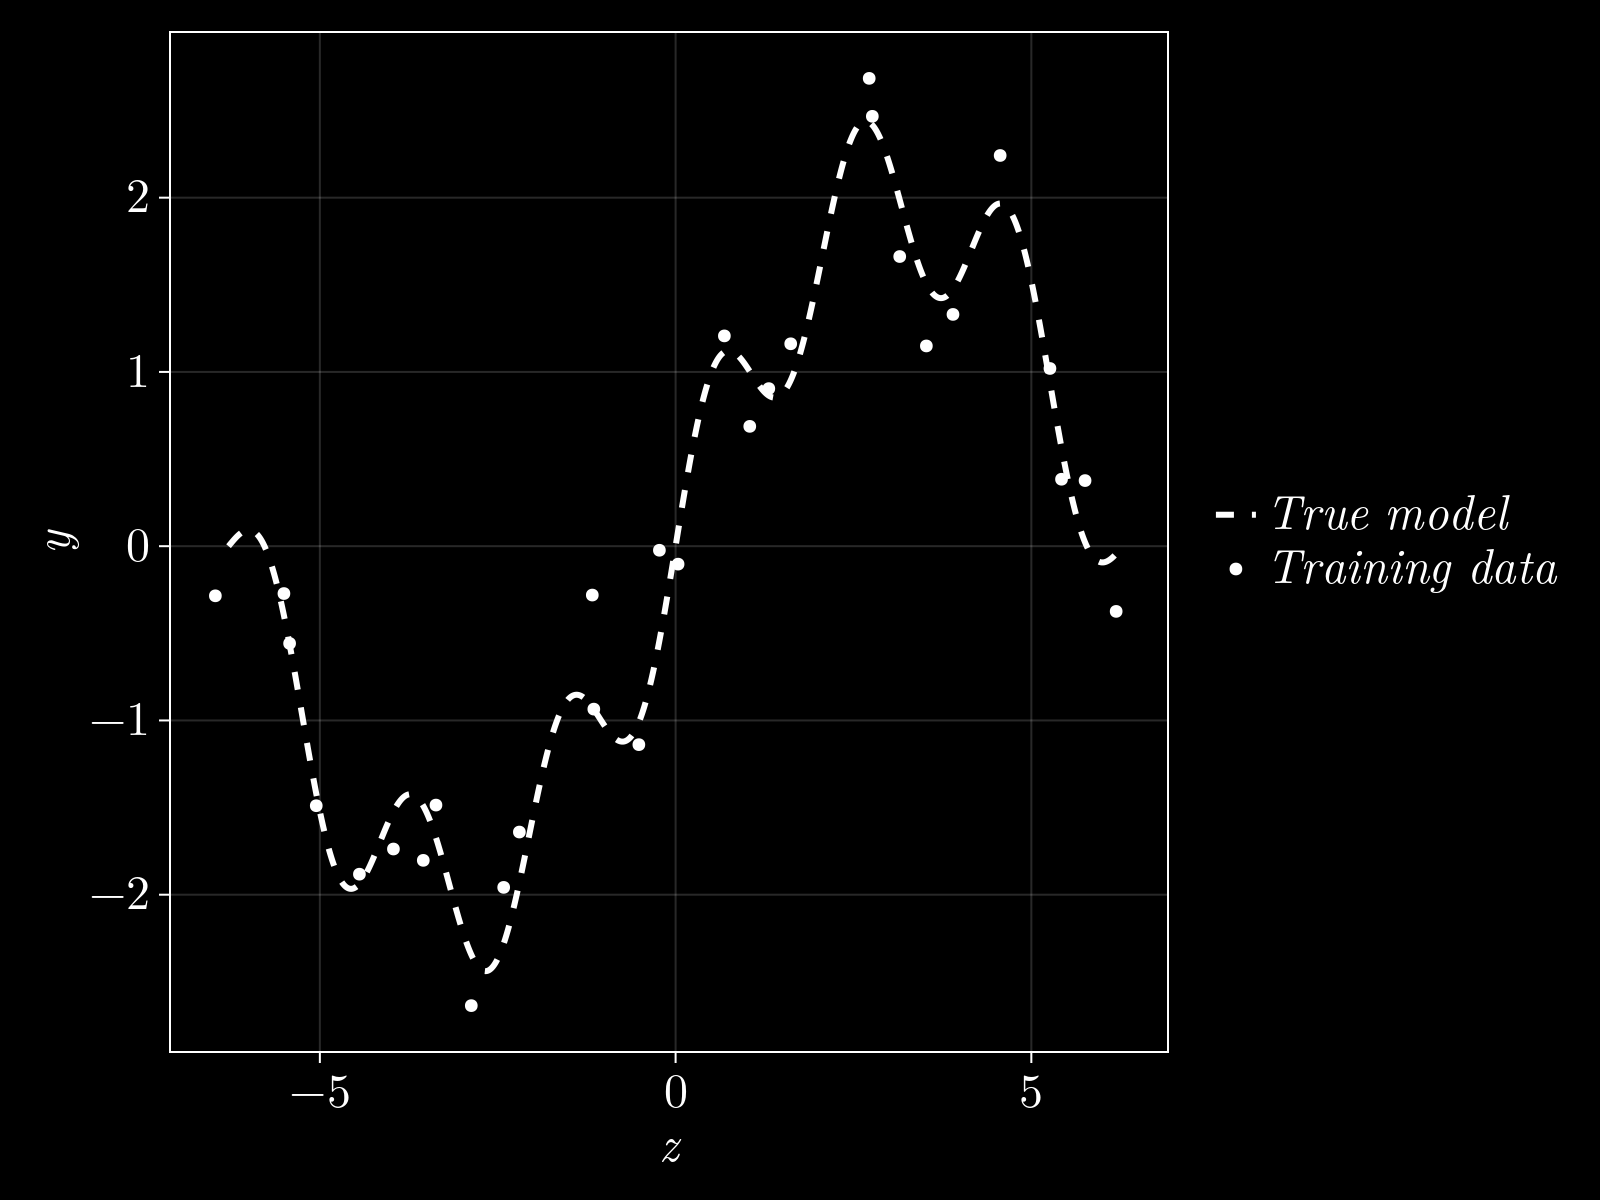

In [3]:
# Plot

# array for creating analytical plot lines
N_grid = 1000
z_grid = range(-2*pi,2*pi, length=N_grid)
y_grid = f(z_grid)

# set theme
dark_latexfonts = merge(theme_black(), theme_latexfonts())
set_theme!(dark_latexfonts)

fig = Figure(fontsize = 24, size = (800,600))
ax = Axis(fig[1, 1], xlabel = L"z", ylabel = L"y")
lines!(ax, z_grid, y_grid, color="white", label=L"True~model", linewidth=3, linestyle=:dash)
scatter!(ax, z, y, color="white", label=L"Training~data")
fig[1,2] = Legend(fig, ax, framevisible = false)
fig

## OLS regressor

Sinusoidal model of degree $q$:
$$ h(z,w) = \sum_{k=0}^q w_{k} z^{k-1} $$

In [4]:
# Feature vector
function feature(z, q)
    Z = zeros(length(z), q)
    if length(z) == 1
        for k in 1 : q
            Z[1, k] = z^(k-1)
        end
    else
        for k in 1 : q
            Z[:, k] = z.^(k-1)
        end
    end
    return Z
end

# Ridge regressor
function Ridge_regression(z, y, q, λ=0)

    # obtain feature matrix
    Z = feature(z, q)

    # pseudo inverse
    return inv(Z' * Z + λ * I) * Z' * y;
end

# model evaluation
function h(z, w)
    return feature(z, length(w)) * w
end;

# Loss function
function L(z, y, w)
    N = length(z)
    return 1/N * norm(h(z, w) - y, 2)^2
end;

In [5]:
q_all = [3, 5, 15, 30]
w_all = zeros(q_all[end], length(q_all))
y_all = zeros(length(z_grid), length(q_all))

for i = 1 : length(q_all)
    q = q_all[i]
    w_i = Ridge_regression(z, y, q);
    w_all[1 : q, i] = w_i
    y_all[:, i] = h(z_grid, w_i)

    print("\nq = ")
    println(q)
    print("w: ")
    println(w_i)
    print("In sample loss: ")
    println(L(z, y, w_i))
    print("Out of sample loss: ")
    println(L(z_grid, y_grid, w_i))
end


q = 3
w: 

[0.03254614273814818, 0.2623064807842629, -0.005297268202799427]
In sample loss: 

1.0455255265266077
Out of sample loss: 1.0264068771233417

q = 5
w: [-0.030416455114355867, 0.8256977567560293, 0.015925962878950456, -0.022395189982948795, -0.0006400581878128603]
In sample loss: 0.20863353625828254
Out of sample loss: 0.14124158963212818

q = 15
w: [-0.02494544715500524, 0.3697962960997643, -0.0789590226177097, 0.3935515833140357, 0.10238070757588957, -0.08298749350667833, -0.023450263371231017, 0.006769182037023036, 0.002163754625733816, -0.0002642603700440116, -9.571788213114107e-5, 4.9264897333213195e-6, 2.0236624387031527e-6, -3.545840741287469e-8, -1.6392772100184516e-8]
In sample loss: 0.10746149311993133
Out of sample loss: 1.1748898745195988

q = 30
w: [0.1514236904331483, 2.5510796951130033, -0.7119029238820076, -2.596581744030118, 0.7995152391958982, 1.0980154257267714, -0.2808858879143372, -0.20031435368582606, 0.04774013831047341, 0.01753690914483741, -0.004514721476880368, -0.000606551424425561, 0.00024247196893156797, -1.4054427538212622e-5, -6.75976012

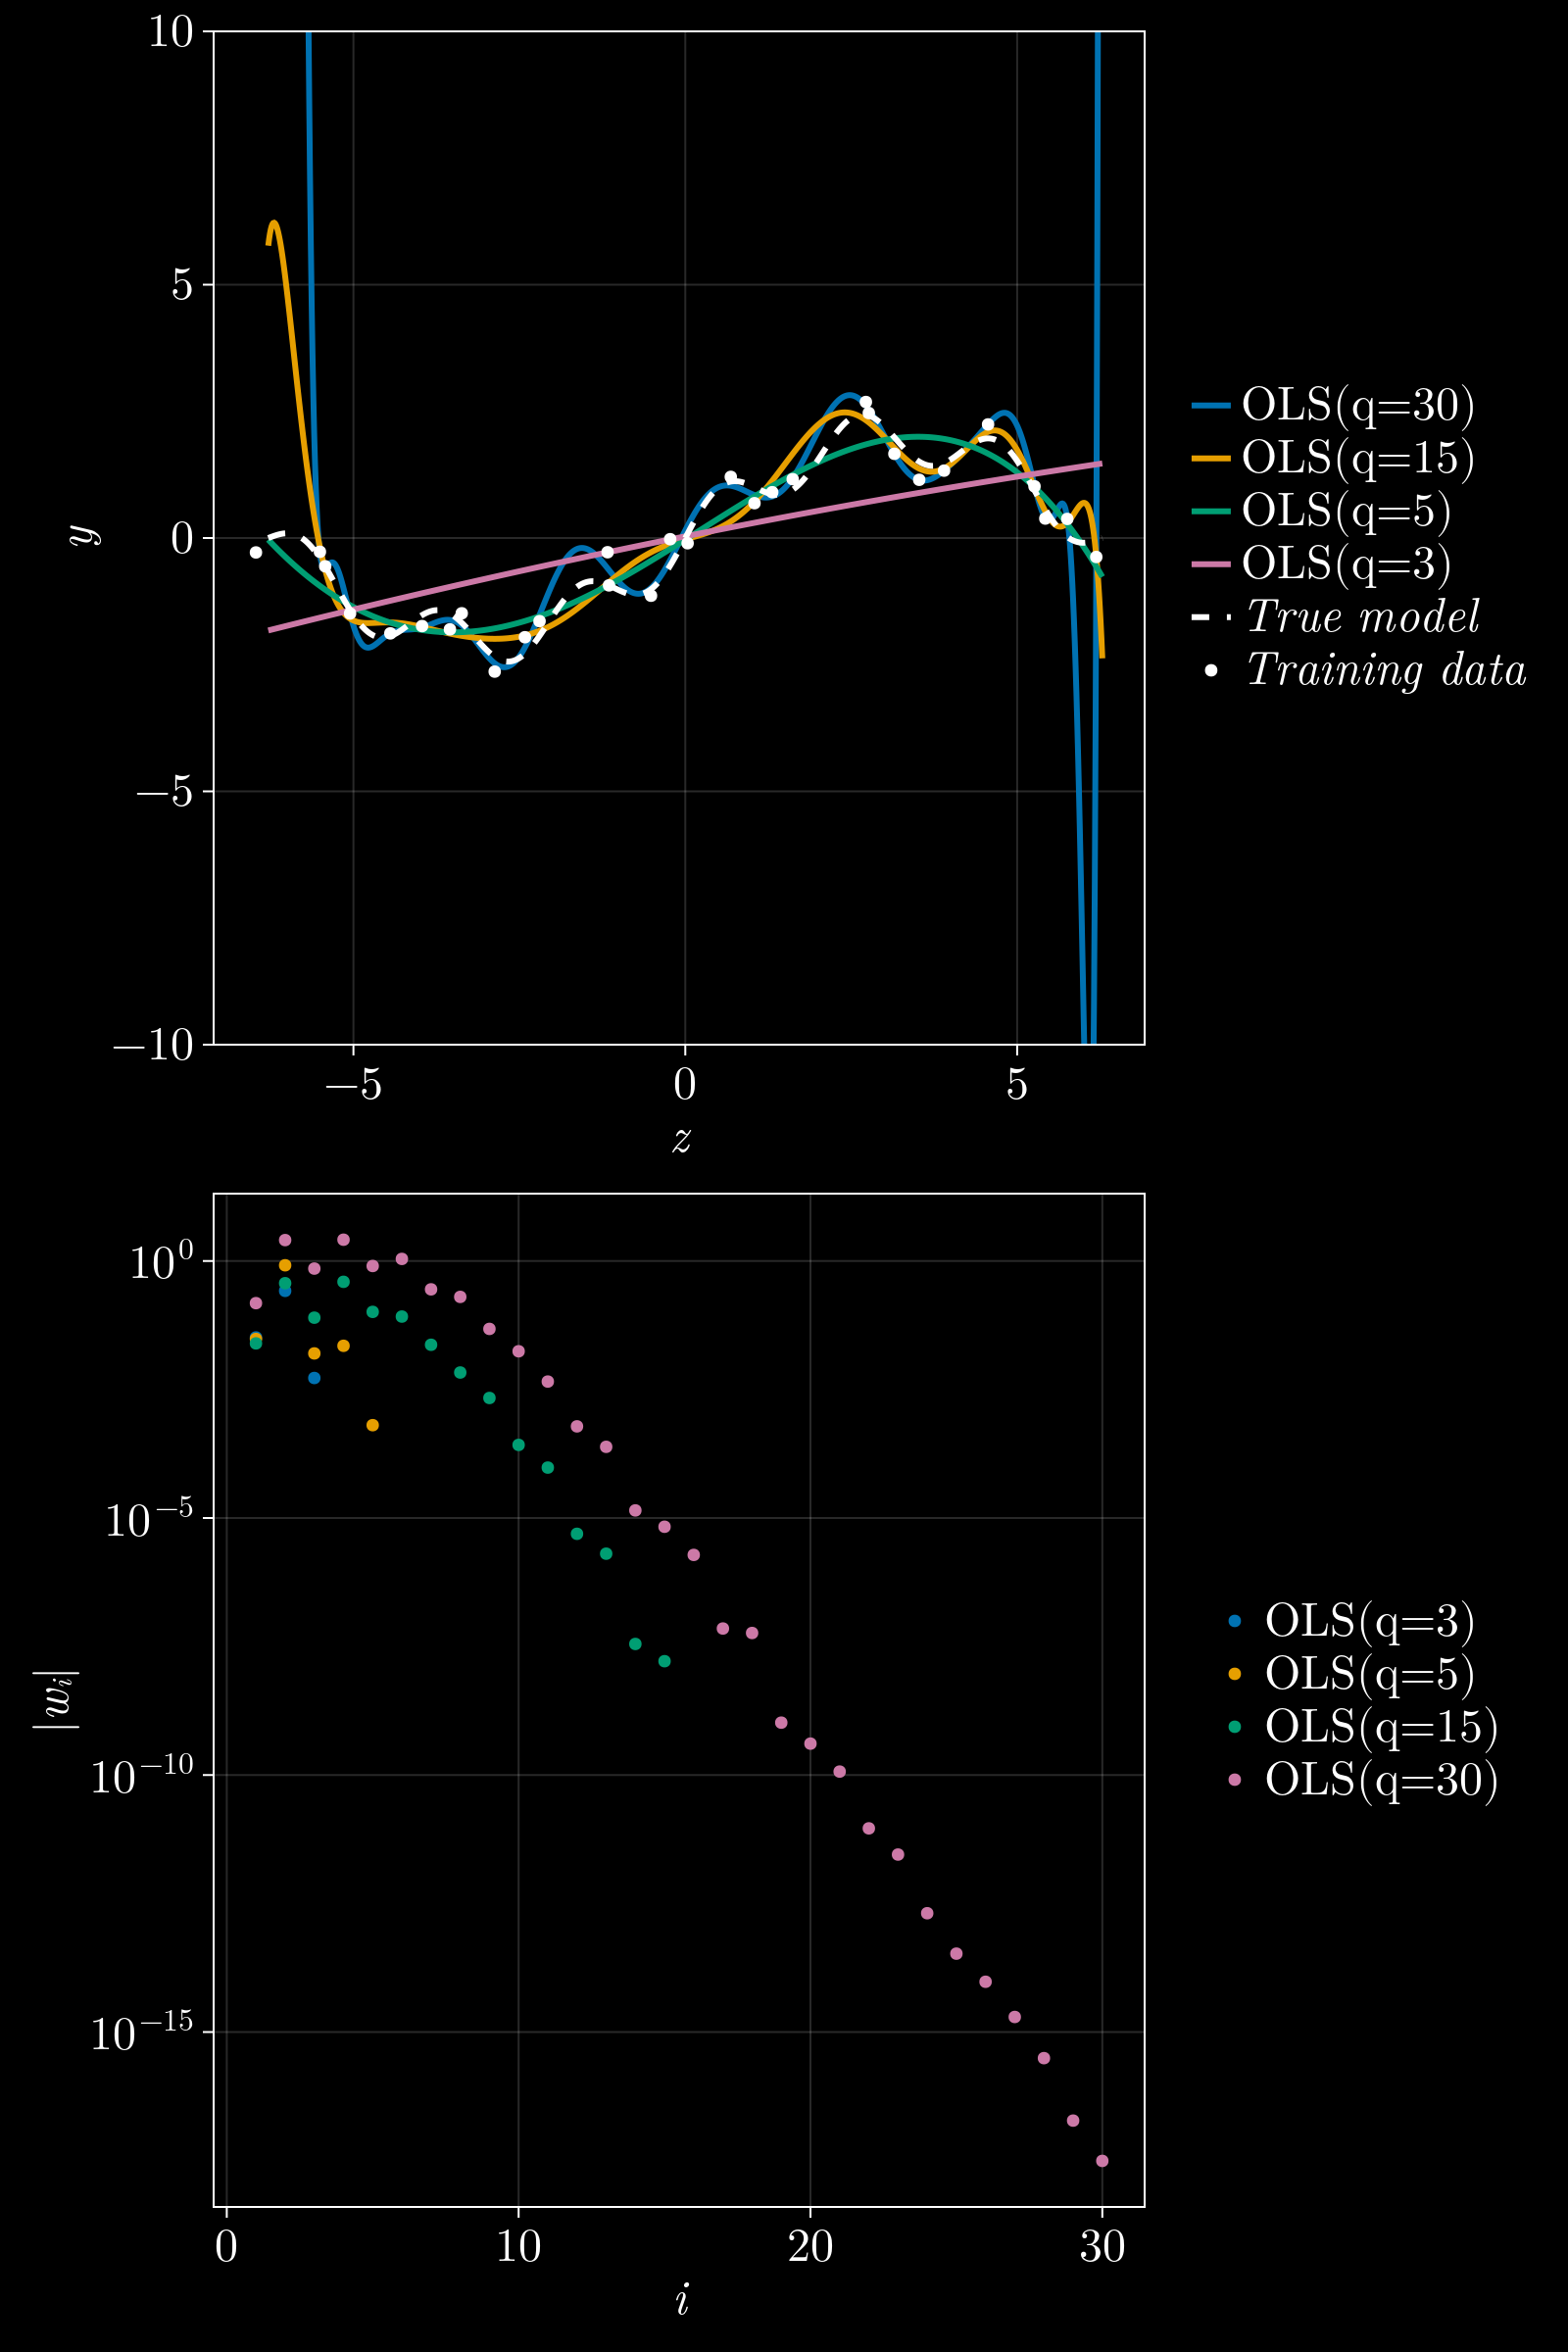

In [6]:
# Plot

fig = Figure(fontsize = 24, size = (800,1200))
ax1 = Axis(fig[1, 1], xlabel = L"z", ylabel = L"y", limits = (nothing, nothing, -10, 10))
for i = length(q_all) : -1 : 1
    lines!(ax1, z_grid, y_all[:, i], label=@sprintf("OLS(q=%d)", q_all[i]), linewidth=3)
end
lines!(ax1, z_grid, y_grid, color="white", label=L"True~model", linewidth=3, linestyle=:dash)
scatter!(ax1, z, y, color="white", label=L"Training~data")
fig[1, 2] = Legend(fig, ax1, framevisible = false)

ax2 = Axis(fig[2, 1], xlabel = L"i", ylabel = L"|w_i|", yscale = log10)
for i = 1 : length(q_all)
    w_i = w_all[1 : q_all[i], i]
    scatter!(ax2, range(1,length(w_i),length=length(w_i)), abs.(w_i), label=@sprintf("OLS(q=%d)", q_all[i]))
end
fig[2, 2] = Legend(fig, ax2, framevisible = false)
fig

## Ridge regression

In [7]:
q = 30;
λ_all = [1e-3, 1e-2, 1e-1, 1, 10]
wRR_all = zeros(q, length(λ_all))
yRR_all = zeros(length(z_grid), length(λ_all))

for i = 1 : length(λ_all)
    λ = λ_all[i]
    w_i = Ridge_regression(z, y, q, λ);
    wRR_all[:, i] = w_i
    yRR_all[:, i] = h(z_grid, w_i)

    print("\nlambda = ")
    println(λ)
    print("w: ")
    println(w_i)
    print("In sample loss: ")
    println(L(z, y, w_i))
    print("Out of sample loss: ")
    println(L(z_grid, y_grid, w_i))
end


lambda = 0.001
w: [0.13944493239978328, 2.4967220327816904, -0.6484420322813094, -2.49383679125458, 0.7328978641889989, 1.0337224276736379, -0.25408833869732916, -0.18101709289476275, 0.042287353819119744, 0.014336604566778988, -0.0038872059776622336, -0.00029792114946758375, 0.00020007258149234985, -3.106051053691772e-5, -5.109402152925213e-6, 2.379075283442944e-6, 3.726114528035396e-8, -5.999410168655572e-8, -7.75186401180683e-10, 2.9602926707172905e-10, 1.1666663395451006e-10, 6.206802229840637e-12, -2.9782545956605778e-12, -7.40960942504764e-14, -2.2057944439056226e-14, 1.2268294976715646e-14, 1.6644515576161911e-15, -4.531512480845444e-16, -1.6347031295378338e-17, 4.509376091609808e-18]
In sample loss: 0.026099394578985302
Out of sample loss: 13026.192046657481

lambda = 0.01
w: [0.0705229687737301, 2.161835677921772, -0.28920652775559574, -1.8662643423303962, 0.3570728600025177, 0.6432423833757639, -0.10342550839413889, -0.06440315255895257, 0.011710080783814192, -0.004919682862

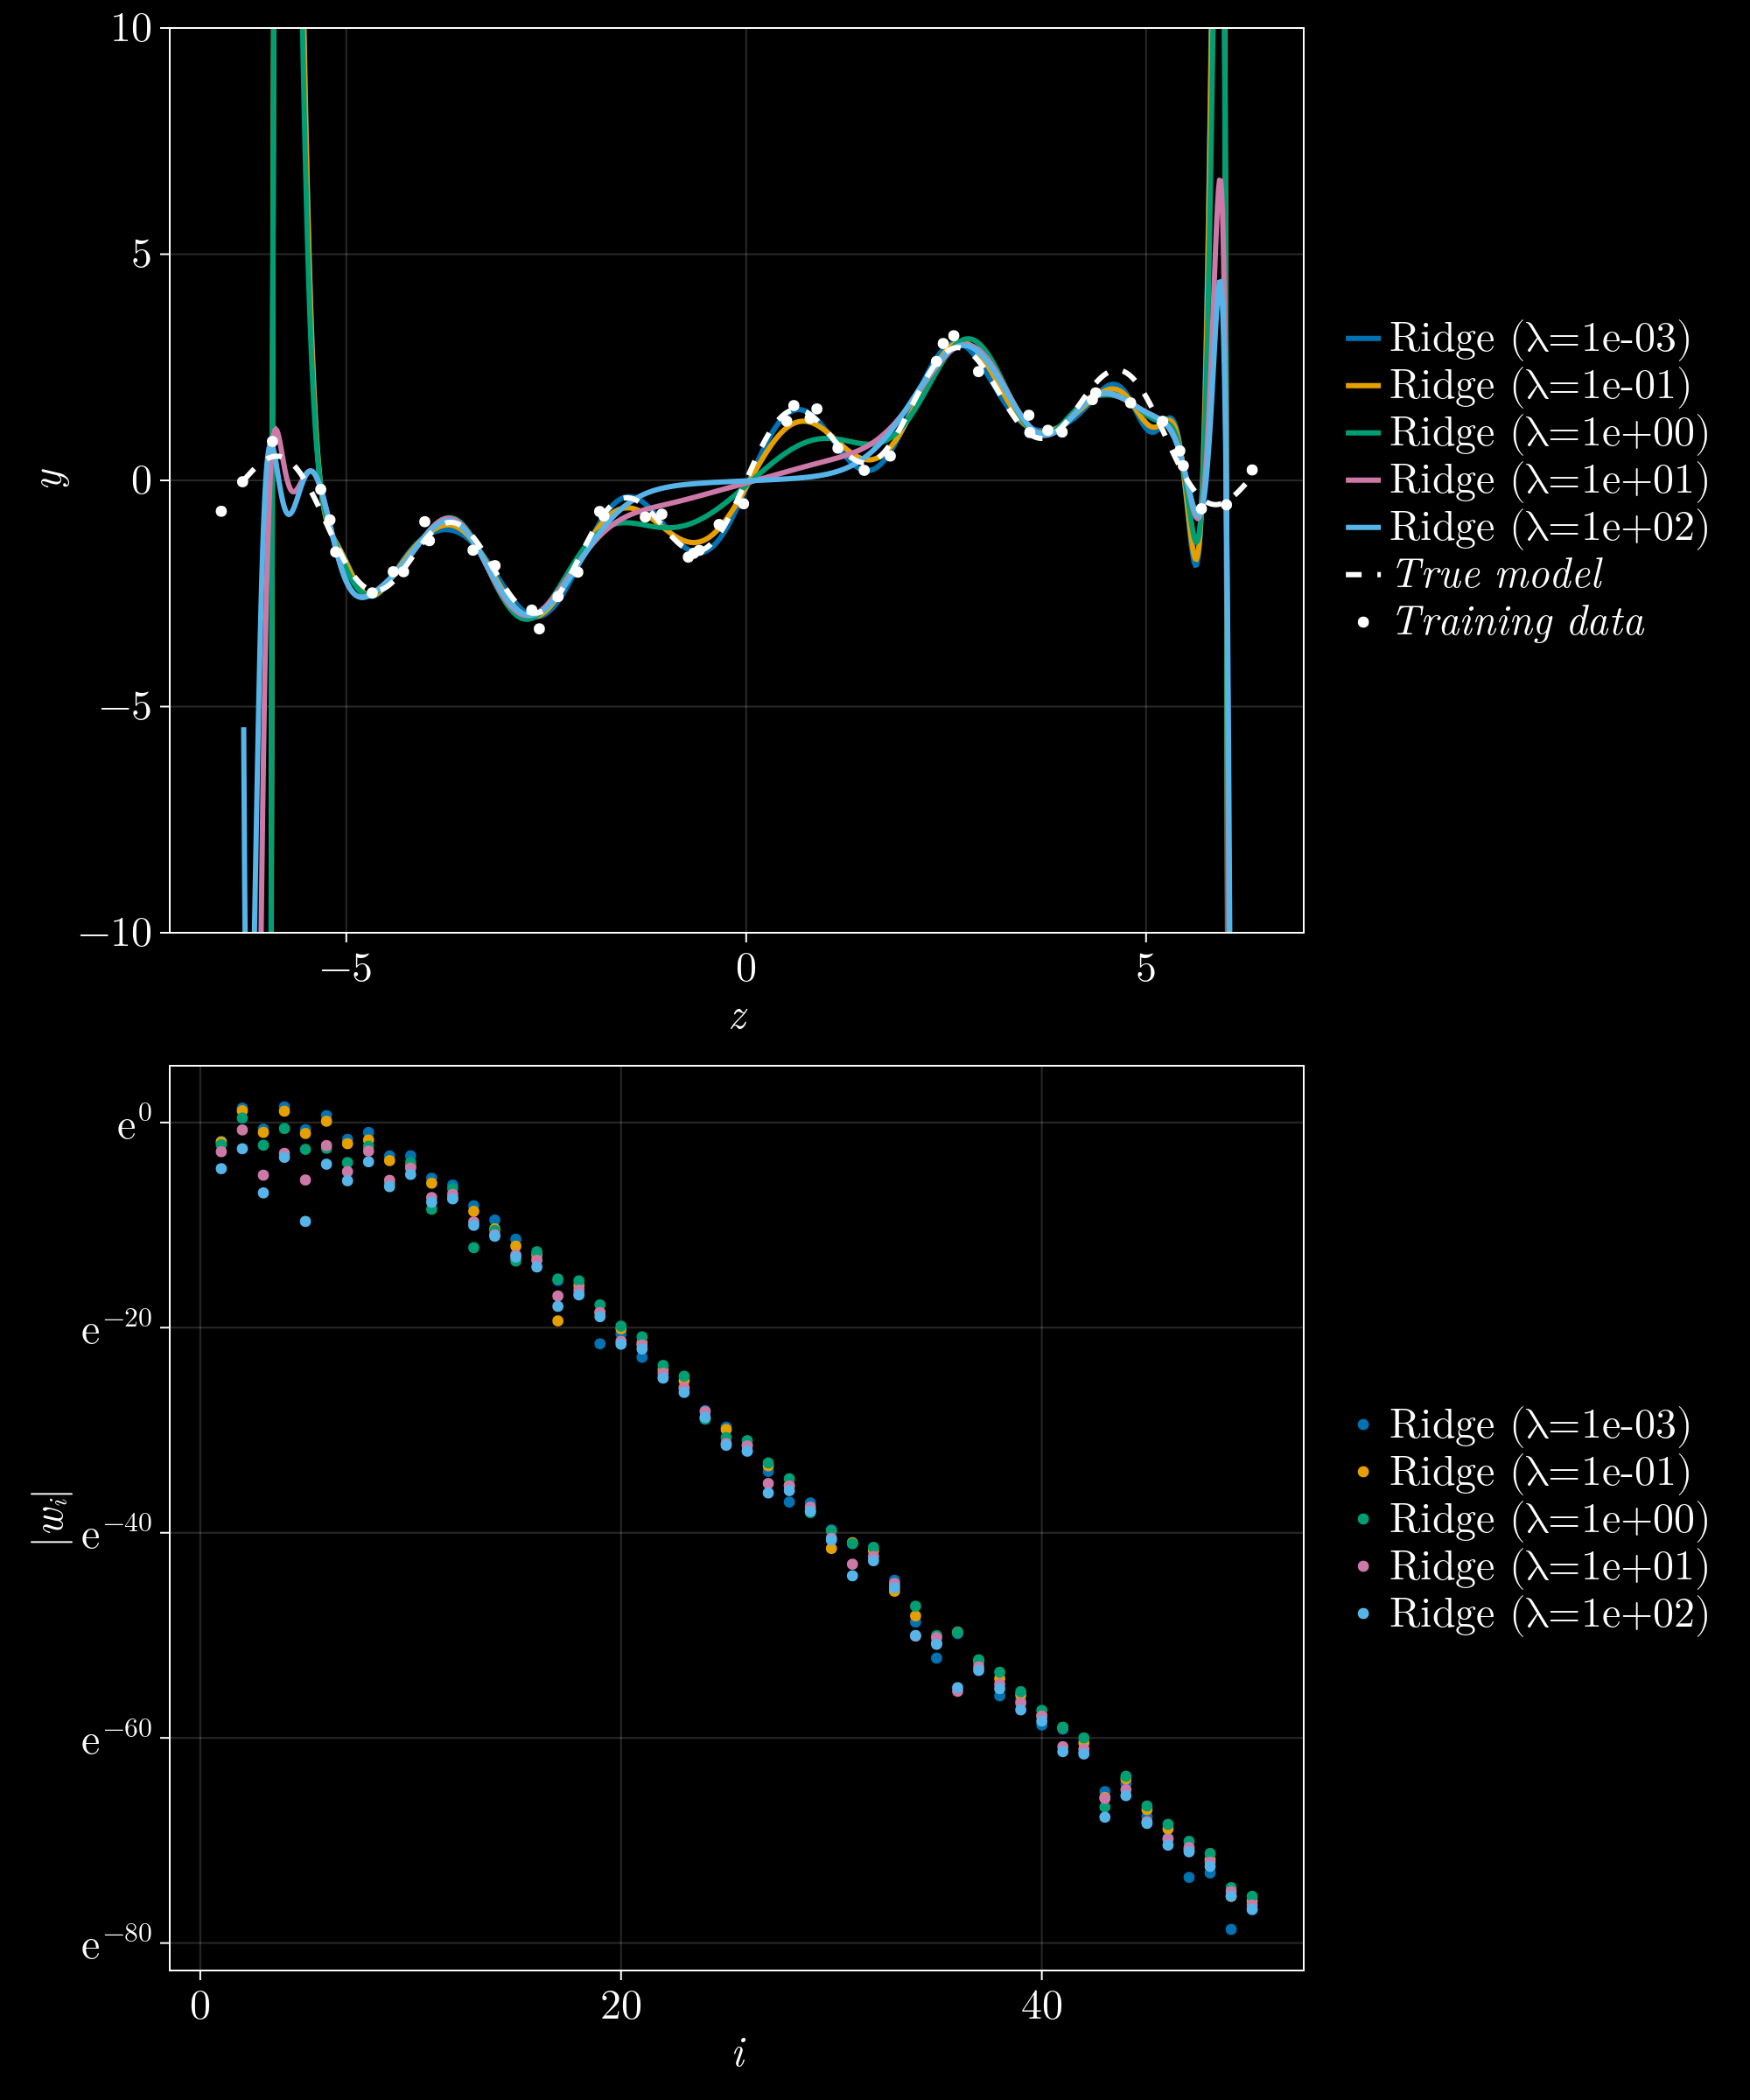

In [8]:
# Plot

fig = Figure(fontsize = 24, size = (1000,1200))
ax1 = Axis(fig[1, 1], xlabel = L"z", ylabel = L"y", limits = (nothing, nothing, -10, 10))
for i = 1 : length(λ_all)
    lines!(ax1, z_grid, yRR_all[:, i], label=@sprintf("Ridge (λ=%.0e)", λ_all[i]), linewidth=3)
end
lines!(ax1, z_grid, y_grid, color="white", label=L"True~model", linewidth=3, linestyle=:dash)
scatter!(ax1, z, y, color="white", label=L"Training~data")
fig[1, 2] = Legend(fig, ax1, framevisible = false)

ax2 = Axis(fig[2, 1], xlabel = L"i", ylabel = L"|w_i|", yscale = log)
for i = 1 : length(λ_all)
    w_i = wRR_all[:, i]
    scatter!(ax2, range(1,length(w_i),length=length(w_i)), abs.(w_i), label=@sprintf("Ridge (λ=%.0e)", λ_all[i]))
end
fig[2, 2] = Legend(fig, ax2, framevisible = false)
fig

## LASSO

We want to solve the problem
$$ \min_{w\in\R^q} \|Y-Zw\|_2^2 + \lambda \|w\|_1 = \min_{w\in\R^q} L_{reg} + L_{sparse}. $$

The approach we are going to use is **coordinate descent**, meaning that we fix all weights in $w\in\R^q$ except for $w_j$, which will allow us to find an explicit solution for $w_j$. We then cyclically sweep over the parameters until the algorithm converges to a minimum.

To this end, we begin with formulating the loss function in a component-wise fashion:
$$ L_{reg} = \sum_{i=1}^N \left( y_i - \sum_{j=1}^q z_{i,j} w_j \right)^2. $$

Now, taking the partial derivative of $L_{reg}$ w.r.t. $w_j$, we find:
$$ \frac{\partial L_{reg}}{\partial w_j} = -2\sum_{i=1}^N z_{i,j}\left( y_i - \sum_{j=1}^q z_{i,j} w_j \right)\qquad\qquad \\
= -2\sum_{i=1}^N z_{i,j}\left( y_i - \sum_{k\neq j} z_{i,k} w_k - z_{i,j}w_j \right) \\
= -2\underbrace{\sum_{i=1}^N z_{i,j}\left( y_i - \sum_{k\neq j} z_{i,k} w_k\right)}_{\rho_j} + 2 w_j \underbrace{\sum_{i=1}^N z_{i,j}^2}_{=\phi_j}\\
= -2 \rho_j + 2 w_j \phi_j. $$

Next, we can define the drivative of $L_{sparse}$, for which we find a true subdifferential (i.e., a set of subradients) when $w_j=0$:
$$ \frac{\partial}{\partial w_j} \lambda \|w\|_1 = \begin{cases} -\lambda, & w_j<0 \\ [-\lambda,\lambda], & w_j=0 \\ \lambda, & w_j>0 \end{cases}. $$

Combining the two, we find:
$$ \frac{\partial L}{\partial w_j} = \begin{cases} -2 \rho_j + 2 w_j \phi_j -\lambda, & w_j<0 \\ [-2 \rho_j-\lambda,-2 \rho_j+\lambda], & w_j=0 \\ -2 \rho_j + 2 w_j \phi_j + \lambda, & w_j>0 \end{cases}. $$

Given $\lambda$, $\rho_j$ and $\phi_j$ (where $\phi_j >0$), this allows us to explicitly calculate $w_j$. Moreover the value of $\rho_j$ determines which of the three cases is actually active (otherwise, we would get a contradiction):
$$ 
\qquad\qquad \rho_j < -\frac{\lambda}{2} \qquad \Rightarrow \qquad w_j = \frac{\rho_j + \frac{\lambda}{2}}{\phi_j}, \\
-\frac{\lambda}{2} \leq \rho_j \leq \frac{\lambda}{2} \qquad \Rightarrow \qquad w_j = 0, \qquad \\
\qquad\qquad \rho_j > \frac{\lambda}{2} \qquad \Rightarrow \qquad w_j = \frac{\rho_j - \frac{\lambda}{2}}{\phi_j}.
$$

In [8]:
function calc_rho_phi(Z,y,w,j)
    N = size(Z, 1)
    q = length(w)

    ρj = 0
    for i in 1 : N
        zw_ij = dot(Z[i, :], w) - Z[i, j] * w[j]
        ρj += Z[i, j] * (y[i] - zw_ij)
    end

    ɸj = sum(Z[:,j].^2)

    return ρj, ɸj
end;

function opt_wj(Z,y,w,j,λ)
    N = size(Z, 1)
    ρj, ɸj = calc_rho_phi(Z,y,w,j)
    if ρj < - λ/2
        wj_opt = (ρj + N*λ/2) / ɸj
    elseif ρj > λ/2
        wj_opt = (ρj - N*λ/2) / ɸj
    else
        wj_opt = 0
    end
    return wj_opt
end;

function LASSO(z, y, q, λ, w = Ridge_regression(z, y, q, λ))

    # obtain feature matrix
    Z = feature(z, q)

    # previous weight to check convergence
    w_prev = randn(q)

    # count number of loops
    nloops = 0
    while norm(w_prev - w, 2) / norm(w_prev, 2) > 1e-2 && nloops < 10000
        w_prev = deepcopy(w)
        for j = 1 : q
            w[j] = opt_wj(Z,y,w,j,λ)
        end
        nloops += 1
    end

    # println(@sprintf("Terminated after %d loops", nloops))
    return w, nloops
end;

# LASSO loss
function L_LASSO(z, y, w, λ)
    N = length(z)
    return 1/N * norm(h(z, w) - y, 2)^2 + λ * norm(w, 1)
end;

In [9]:
q = 30
λ_all = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0, 1e1]

wL1_all = zeros(q, length(λ_all))
wL1_GD_all = zeros(q, length(λ_all))
yL1_all = zeros(length(z_grid), length(λ_all))
nZeros = zeros(length(λ_all))
L1_all = zeros(length(λ_all))
for i = 1 : length(λ_all)
    λ = λ_all[i]
    if i > 1
        w_i, nloops = LASSO(z, y, q, λ, 0.9 * wL1_all[:, i]);
    else
        w_i, nloops = LASSO(z, y, q, λ);
    end
    wL1_all[:, i] = w_i
    yL1_all[:, i] = h(z_grid, w_i)
    nZeros[i] = sum(abs.(wL1_all[:, i]) .> 1e-4)
    L1_all[i] = norm(w_i, 1)

    println(@sprintf("Lambda = %.0e: L = %f, L_out = %f, ||w||_1 = %f, #loops = %d", λ, L_LASSO(z, y, wL1_all[:, i], λ), L_LASSO(z_grid, y_grid, wL1_all[:, i], λ), norm(wL1_all[:, i], 1), nloops))
    
end

Lambda = 1e-05: L = 0.025323, L_out = 10012.689800, ||w||_1 = 8.455245, #loops = 1
Lambda = 1e-04: L = 0.187701, L_out = 0.132640, ||w||_1 = 0.820571, #loops = 18
Lambda = 1e-03: L = 0.188454, L_out = 0.133426, ||w||_1 = 0.819207, #loops = 18
Lambda = 1e-02: L = 0.195903, L_out = 0.141214, ||w||_1 = 0.806114, #loops = 18


Lambda = 1e-01: L = 0.259337, L_out = 0.286696, ||w||_1 = 0.864125, #loops = 10000


Lambda = 1e+00: L = 0.923324, L_out = 0.944320, ||w||_1 = 0.458647, #loops = 10000


Lambda = 1e+01: L = 3.035656, L_out = 3.141279, ||w||_1 = 0.201687, #loops = 10000


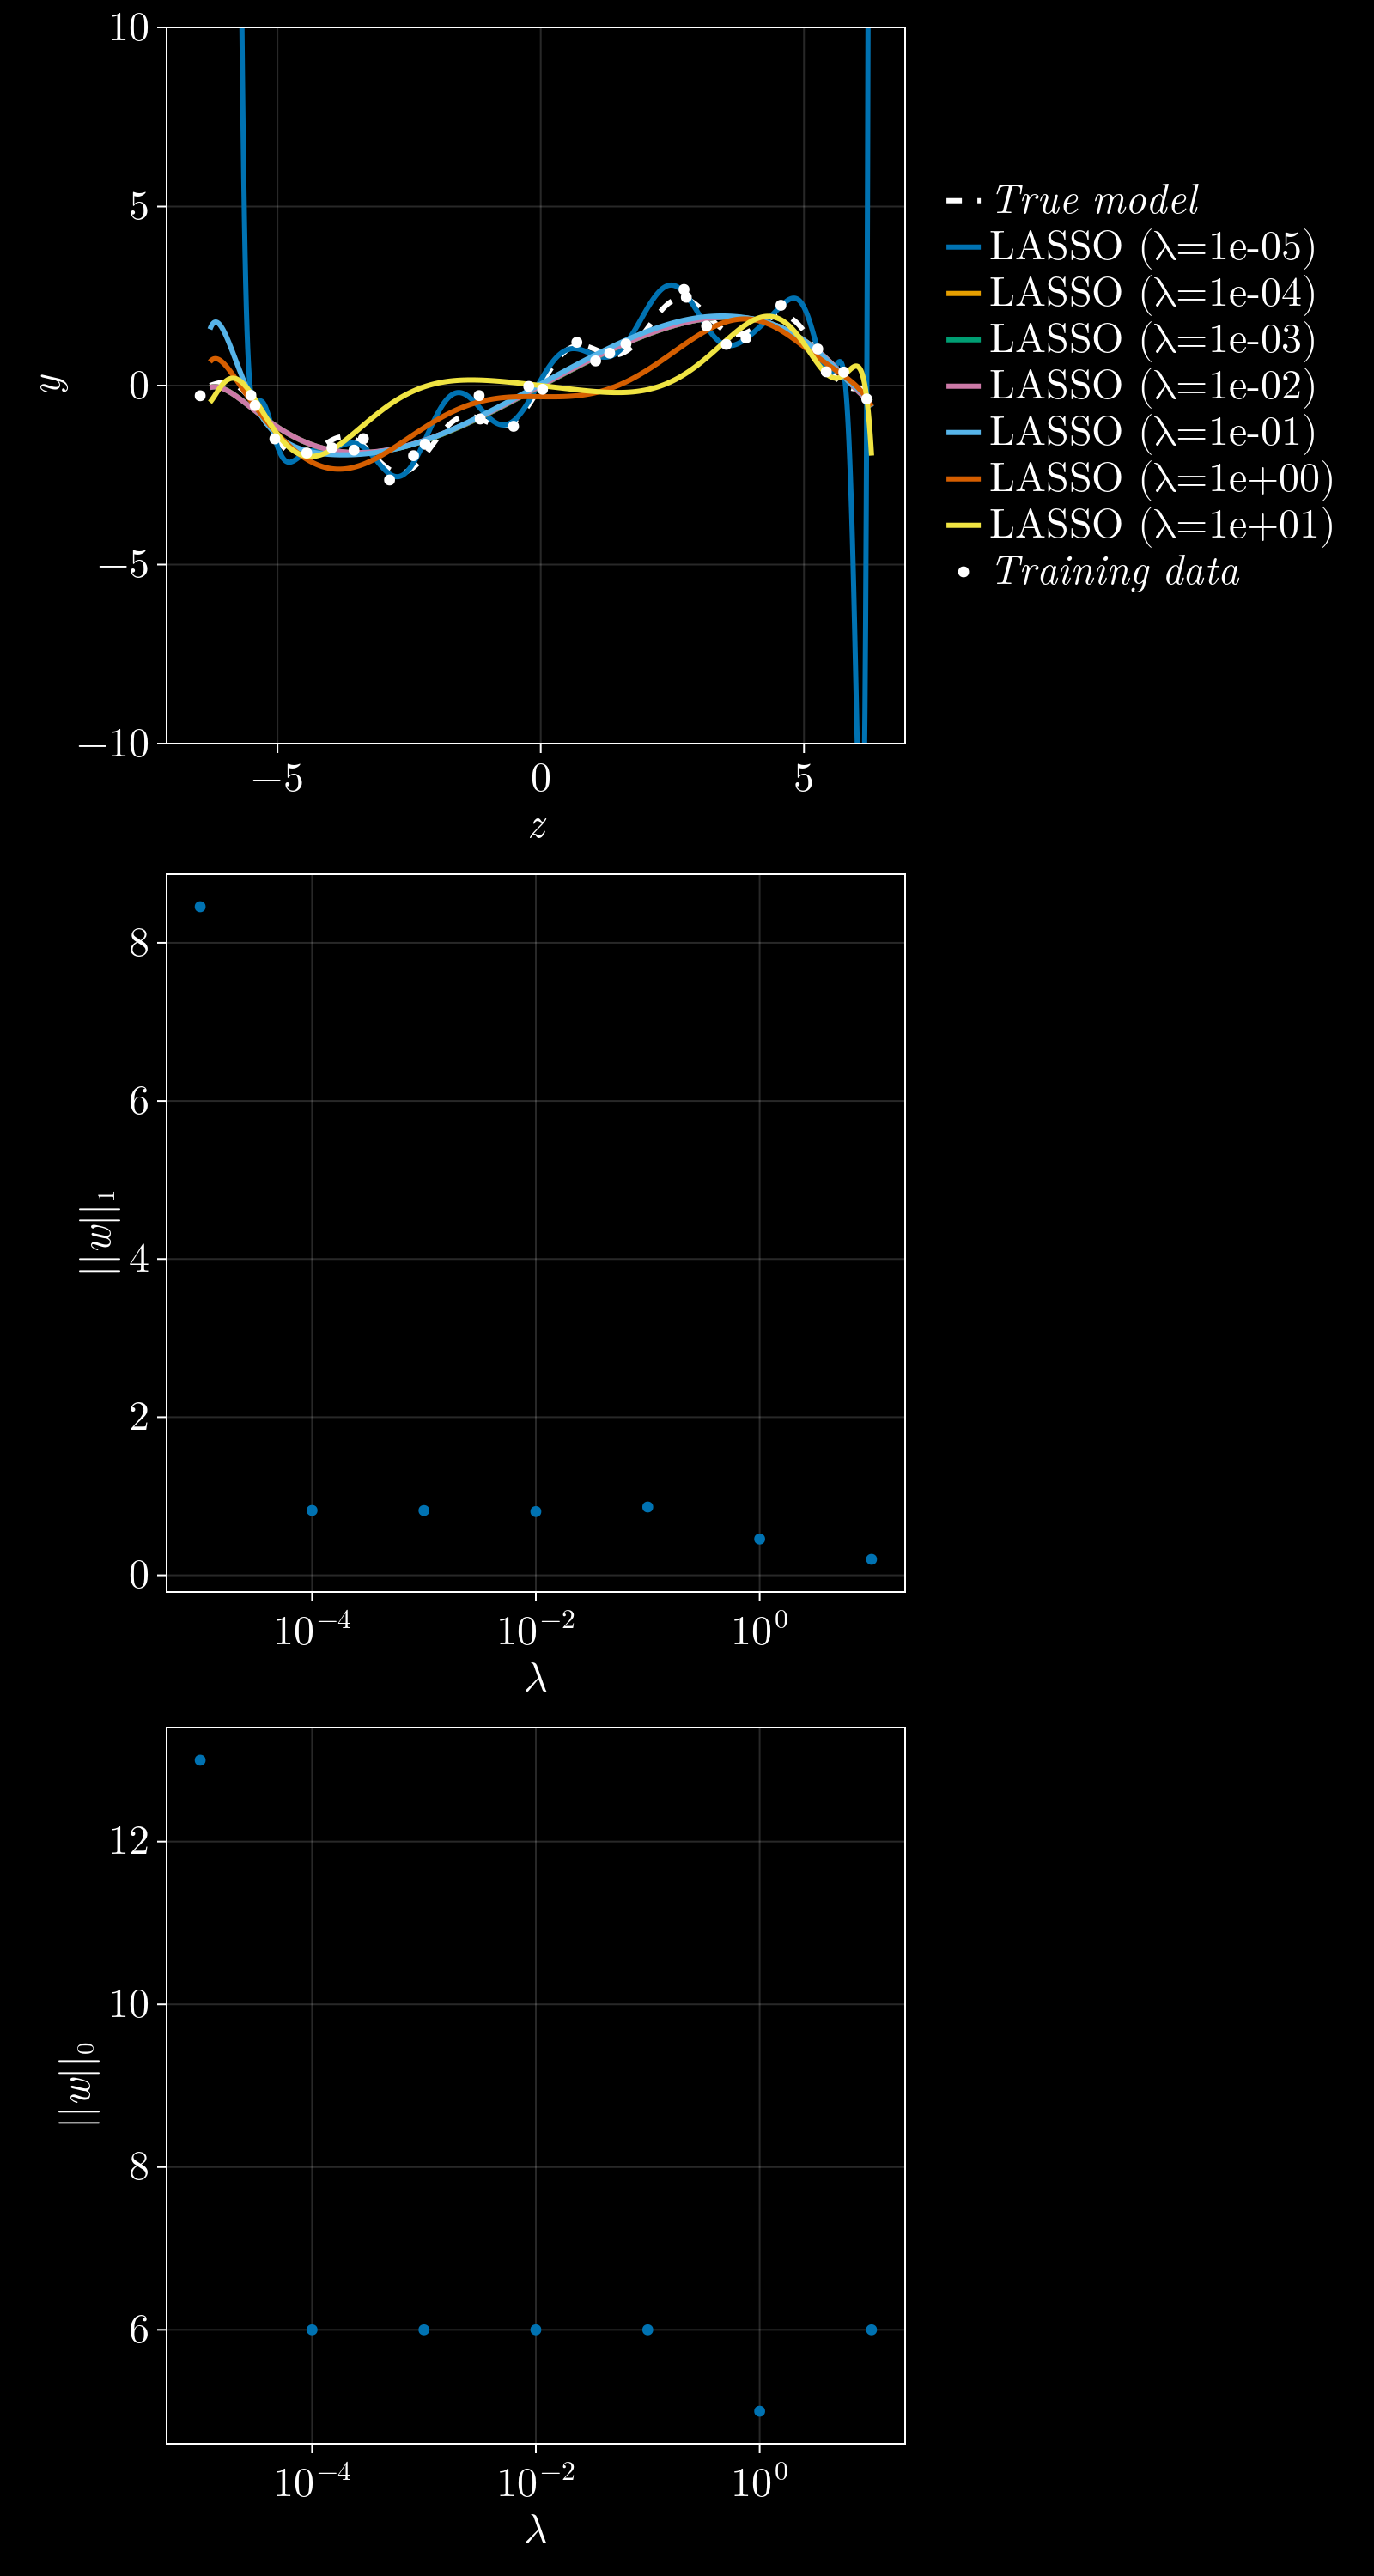

In [10]:
# Plot
figL1 = Figure(fontsize = 24, size=(800,1500))
ax1 = Axis(figL1[1, 1], xlabel = L"z", ylabel = L"y", limits = (nothing, nothing, -10, 10))
lines!(ax1, z_grid, y_grid, color="white", label=L"True~model", linewidth=3, linestyle=:dash)
for i = 1 : length(λ_all)
    lines!(ax1, z_grid, yL1_all[:, i], label=@sprintf("LASSO (λ=%.0e)", λ_all[i]), linewidth=3)
end
scatter!(ax1, z, y, color="white", label=L"Training~data")
figL1[1, 2] = Legend(figL1, ax1, framevisible = false)

ax2 = Axis(figL1[2, 1], xlabel = L"\lambda", ylabel = L"||w||_1", xscale=log10)
scatter!(ax2, λ_all, L1_all)

ax3 = Axis(figL1[3, 1], xlabel = L"\lambda", ylabel = L"||w||_0", xscale=log10)
scatter!(ax3, λ_all, nZeros)
figL1

### Cross validation

We run the training `n_rep` times using a subset of `n_sub`$<N$ samples in each round. We then estimate the out-of-sample performance using the samples not used during training. The cross validation loss $L_{CV}$ is the average over the `n_sub` runs.

In [11]:
function crossval(z, y, q, n_sub, n_rep, λ_all)
    L_CV = zeros(length(λ_all))
    L_1 = zeros(length(λ_all))
    for i = 1 : length(λ_all)
        for j = 1 : n_rep
            Idel = sort(sample(collect(range(1,N)), n_sub, replace = false))
            zj = deleteat!(collect(copy(z)), Idel)
            yj = deleteat!(collect(copy(y)), Idel)
            wj, nloops = LASSO(zj, yj, q, λ_all[i]);
            L_CV[i] += sum((h(z[Idel], wj) - y[Idel]).^2) / n_sub
            L_1[i] += norm(wj, 1)
        end
        L_CV[i] /= n_rep
        L_1[i] /= n_rep
    end
    imin = argmin(L_CV)
    w_opt = LASSO(z, y, q, λ_all[imin])
    return L_CV, L_1, w_opt
end;

In [12]:
q = 30

nLam = 11
exponent = collect(range(-5, 0, nLam))
λ_all = zeros(nLam)
for i = 1 : nLam
    λ_all[i] = 10^exponent[i]
end

n_sub = Int(N/10)
n_rep = Int(N/n_sub)

L_CV, L_1, w_L1 = crossval(z, y, q, n_sub, n_rep, λ_all);

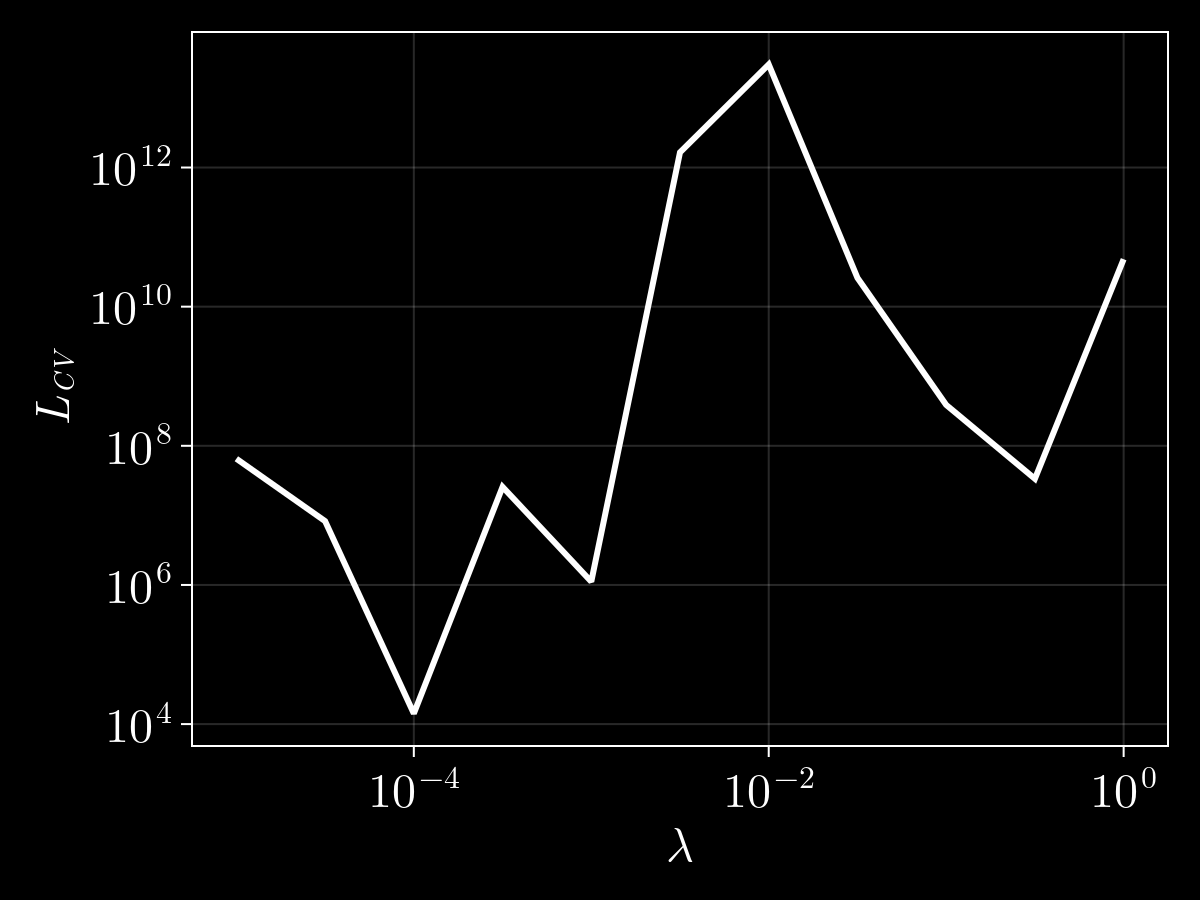

In [13]:
# Plot
fig = Figure(fontsize = 24)
ax1 = Axis(fig[1, 1], xlabel = L"λ", ylabel = L"L_{CV}", xscale = log10, yscale = log10)
lines!(ax1, λ_all, L_CV, color="white", linewidth=3)

# ax2 = Axis(fig[2, 1], xlabel = L"L_{CV}", ylabel = L"||w||_1")
# lines!(ax2, L_CV, L_1, color="white", linewidth=3)

fig

## Sparse Identification of Nonlinear Dynamics (SINDy)

We now apply the LASSO to find dynamical equations from data. To this end, we
* collect data tuples $\{(x_i,\dot{x}_i)\}_{i=1}^N$
* define a (large) dictionary of possible right-hand terms
* identify the relevant terms using the LASSO

The system we study is the Lorenz system:
$$ \dot{x} = \left( \begin{array}{c} \sigma (x_2 - x_1) \\ x_1 (\rho - x_3) - x_2 \\ x_1 x_2 - \beta x_3 \end{array} \right), $$
where $\sigma=10$, $\rho=28$ and $\beta = \frac{8}{3}$.

If we write the system explicitly, we find:
$$ \dot{x} = \left( \begin{array}{c}-10 x_1 + 10 x_2 \\ 28 x_1 - x_2 - x_1 x_3 \\  - \frac{8}{3} x_3 + x_1 x_2 \end{array} \right). $$

In [ ]:
# Example Lorenz system
function rhs(x)
    σ, ρ, β = 10, 28, 8/3
    xdot = [σ * (x[2] - x[1]); x[1] * (ρ - x[3]) - x[2]; x[1] * x[2] - β * x[3]];
    return xdot
end

function rk4(x0, dt, N)
    x = zeros(length(x0), N)
    x[:, 1] = x0
    for i = 1 : N - 1
        k1 = rhs(x[:, i])
        k2 = rhs(x[:, i] + 0.5 * dt * k1)
        k3 = rhs(x[:, i] + 0.5 * dt * k2)
        k4 = rhs(x[:, i] + dt * k3)
        x[:, i + 1] = x[:, i] + dt / 6 * (k1 + 2 * (k2 + k3) + k4)
    end
    return x
end;

In [ ]:
x0 = 10*rand(3)
dt = 0.01
N = 5000
x = rk4(x0, dt, N)
xd = zeros(size(x))
for i = 1 : N
    xd[:, i] = rhs(x[:, i])
end

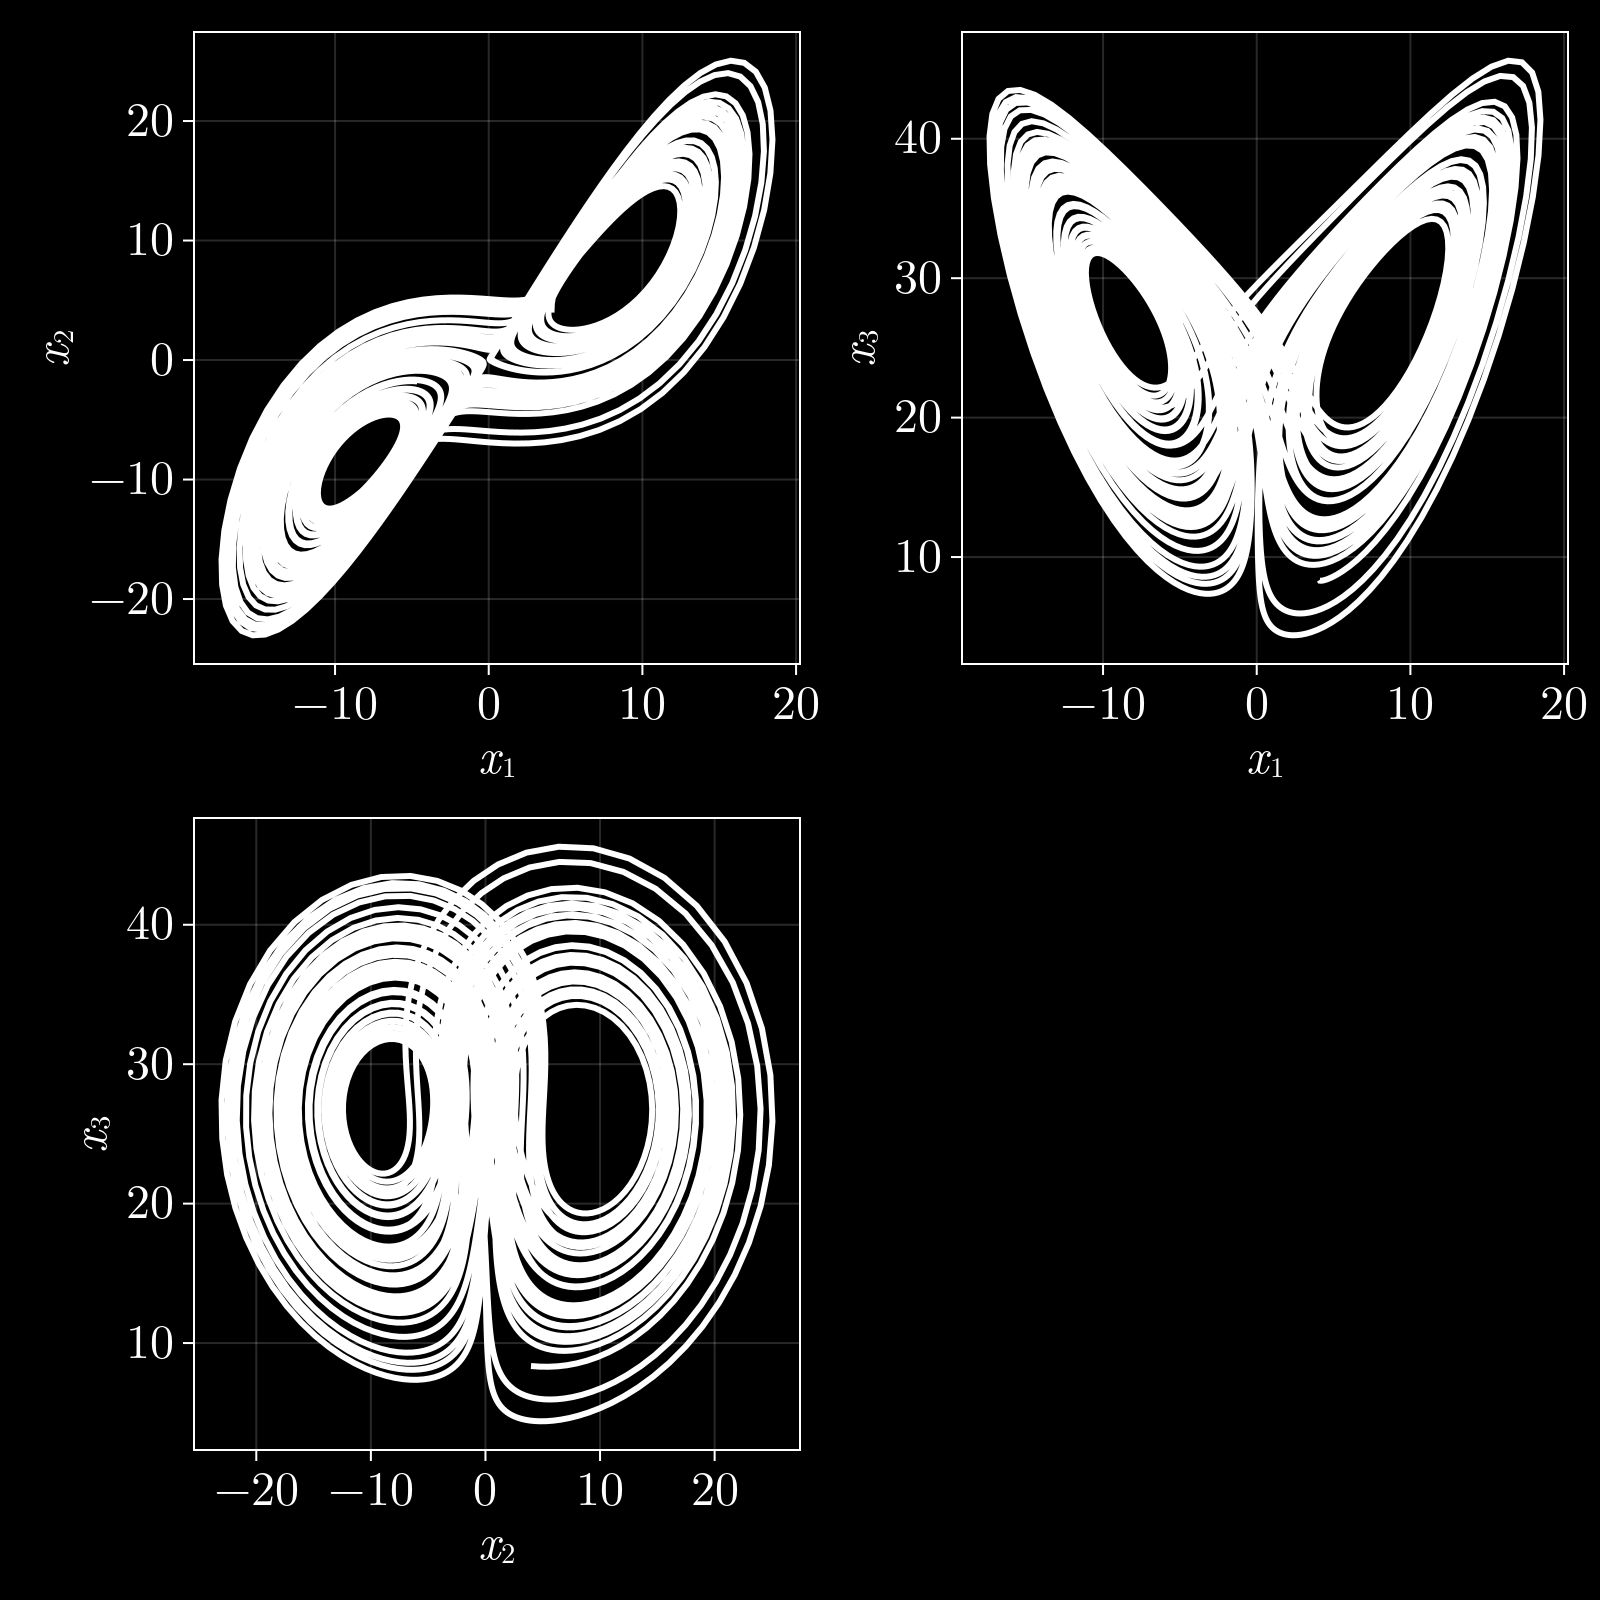

In [ ]:
# Plot

fig = Figure(fontsize = 24, size=(800,800))
ax1 = Axis(fig[1, 1], xlabel = L"x_1", ylabel = L"x_2")
lines!(ax1, x[1, :], x[2, :], color="white", linewidth=3)

ax1 = Axis(fig[1, 2], xlabel = L"x_1", ylabel = L"x_3")
lines!(ax1, x[1, :], x[3, :], color="white", linewidth=3)

ax1 = Axis(fig[2, 1], xlabel = L"x_2", ylabel = L"x_3")
lines!(ax1, x[2, :], x[3, :], color="white", linewidth=3)

fig

Now let's define a *dictionary* $\Psi(x)$ of possible right-hand terms. As we know that the right-hand side is polynomial, we simply create a dictionary of all monomials up to a fixed degree.

In [ ]:
# using Combinatorics, Transducers

# # generic polynomial basis
# function polynomial_basis(n, d; with_bias=true)
#     _n = with_bias ? n+1 : n
#     exponents = multiexponents(_n, d)
#     return function (x)
#         _x = with_bias ? vcat(x, one(eltype(x))) : x
#         exponents |> Map(exponent -> prod(_x.^exponent)) |> collect
#     end
# end;

# hand-crafted polynomial basis until degree 4
function Psi4(z)
    N = size(z, 2)

    psix = zeros(N, 35)
    psix[:, 1] .= 1
    psix[:, 2] = z[1, :]
    psix[:, 3] = z[2, :]
    psix[:, 4] = z[3, :]

    psix[:, 5] = z[1, :] .* z[1, :]
    psix[:, 6] = z[1, :] .* z[2, :]
    psix[:, 7] = z[1, :] .* z[3, :]
    psix[:, 8] = z[2, :] .* z[2, :]
    psix[:, 9] = z[2, :] .* z[3, :]
    psix[:, 10] = z[3, :] .* z[3, :]

    psix[:, 11] = z[1, :] .* z[1, :] .* z[1, :]
    psix[:, 12] = z[1, :] .* z[1, :] .* z[2, :]
    psix[:, 13] = z[1, :] .* z[1, :] .* z[3, :]
    psix[:, 14] = z[1, :] .* z[2, :] .* z[2, :]
    psix[:, 15] = z[1, :] .* z[2, :] .* z[3, :]
    psix[:, 16] = z[1, :] .* z[3, :] .* z[3, :]
    psix[:, 17] = z[2, :] .* z[2, :] .* z[2, :]
    psix[:, 18] = z[2, :] .* z[2, :] .* z[3, :]
    psix[:, 19] = z[2, :] .* z[3, :] .* z[3, :]
    psix[:, 20] = z[3, :] .* z[3, :] .* z[3, :]

    psix[:, 21] = z[1, :] .* z[1, :] .* z[1, :] .* z[1, :]
    psix[:, 22] = z[1, :] .* z[1, :] .* z[1, :] .* z[2, :]
    psix[:, 23] = z[1, :] .* z[1, :] .* z[1, :] .* z[3, :]
    psix[:, 24] = z[1, :] .* z[1, :] .* z[2, :] .* z[2, :]
    psix[:, 25] = z[1, :] .* z[1, :] .* z[2, :] .* z[3, :]
    psix[:, 26] = z[1, :] .* z[1, :] .* z[3, :] .* z[3, :]
    psix[:, 27] = z[1, :] .* z[2, :] .* z[2, :] .* z[2, :]
    psix[:, 28] = z[1, :] .* z[2, :] .* z[2, :] .* z[3, :]
    psix[:, 29] = z[1, :] .* z[2, :] .* z[3, :] .* z[3, :]
    psix[:, 30] = z[1, :] .* z[3, :] .* z[3, :] .* z[3, :]
    psix[:, 31] = z[2, :] .* z[2, :] .* z[2, :] .* z[2, :]
    psix[:, 32] = z[2, :] .* z[2, :] .* z[2, :] .* z[3, :]
    psix[:, 33] = z[2, :] .* z[2, :] .* z[3, :] .* z[3, :]
    psix[:, 34] = z[2, :] .* z[3, :] .* z[3, :] .* z[3, :]
    psix[:, 35] = z[3, :] .* z[3, :] .* z[3, :] .* z[3, :]

    return psix

end;

The identification of the most important terms can be realized using the LASSO algorithm, but component-wise. In total, we find as our model:
$$ \dot{x} = \Psi(x) W \qquad \text{or componentwise:} \qquad \dot{x}_j = \Psi(x) w_j, \quad j=1,2,3.$$

The regression problem thus becomes:
$$ \min_{w_j\in\R^q} \sum_{i=1}^N (\dot{x}_i - w_j^\top (\Psi(x))_i )^2 + \lambda \|w_j\|_1 ,\quad j=1,2,3. $$

For all components at the same time, this is:
$$ \min_{W\in\R^{3\times q}} \sum_{i=1}^N \|\dot{x}_i - W (\Psi(x))_i \|_2^2 + \lambda \|W\|_1 ,\quad j=1,2,3. $$

If we now find a sparse coefficient matrix $W$, then this may point us to the correct terms that created the data. We thus simply solve the component-wise LASSO problem three times.

In [ ]:
function LASSO_multivariate(Z, Y, λ)

    n = size(Y, 2)
    q = size(Z, 2)

    # initialize with ridge regression weights
    W = inv(Z' * Z + λ * I) * Z' * Y;
    
    # previous weight to check convergence
    W_prev = zeros(size(W))

    l = 0
    while opnorm(W_prev - W, 1) / opnorm(W_prev, 1) > 1e-4 && l < 1000
        l += 1
        W_prev = copy(W)
        for i = 1 : n
            for j = 1 : q
                W[j, i] = opt_wj(Z,Y[:, i], W[:, i], j, λ)
            end
        end
    end

    return W
end;

Recall that the Lorenz system is
$$ \dot{x} = \left( \begin{array}{c}-10 x_1 + 10 x_2 \\ 28 x_1 - x_2 - x_1 x_3 \\  - \frac{8}{3} x_3 + x_1 x_2 \end{array} \right), $$
and that we have ordered our dictionary in the following way:
$$(1, x_1, x_2, x_3, x_1^2, x_1 x_2, x_1 x_3, x_2^2, x_2 x_3, x_3^2, \ldots).$$

In [ ]:
λ = 0
Z = Psi4(x);
W = LASSO_multivariate(Z, xd', λ)

35×3 Matrix{Float64}:
   1.08506e-8   -1.74212e-8    2.5437e-8
 -10.0          28.0          -1.85481e-9
  10.0          -1.0           9.6981e-10
  -1.0108e-9    -1.07468e-9   -2.66667
  -1.87436e-10  -7.78979e-11  -1.15604e-10
   1.43915e-10  -9.69885e-11   1.0
   1.62706e-11  -1.0           4.73669e-12
  -1.67949e-11   1.48684e-10   3.37559e-12
  -1.84447e-11   5.62104e-10  -4.56901e-12
   7.8125e-11    4.72979e-11   1.84337e-10
   ⋮                          
  -1.64435e-13   7.57074e-13  -1.23923e-12
   1.02123e-12  -1.67529e-12   9.85743e-14
   1.56879e-13  -1.53899e-12   1.1836e-12
   3.05274e-13  -1.10659e-12   5.24454e-14
   2.0361e-14   -9.86419e-15  -7.52821e-15
  -3.3032e-13    7.7199e-13    1.51234e-14
   1.36923e-14   4.24414e-13  -2.085e-13
  -1.21935e-13   7.04956e-13  -1.3426e-14
   6.75867e-14   1.0661e-13    1.52618e-13

Interestingly, we did not even have to use the LASSO for sparsification ($\lambda = 0$). Let's see what happens if the data is slightly noisy.

In [ ]:
λ = 0
xd_noise = xd + .1 * randn(size(xd))
Z_noise = Z + .1 * randn(size(Z))

W_noise = LASSO_multivariate(Z_noise, xd_noise', λ)

35×3 Matrix{Float64}:
  0.19405       0.0088865    -0.601359
  1.32831       5.30169      -0.0368254
  3.87371       8.56397      -0.0213061
 -0.102751      0.556336     -1.99547
  0.0482868     0.23187       0.542281
 -0.346247      0.189277      0.521404
 -1.30472       1.2107        0.0108988
  0.162837     -0.140933      0.0868371
  0.717141     -0.7244        0.00154321
  0.0171347    -0.103338     -0.113381
  ⋮                          
  0.000387319   0.000568221  -0.000194045
  0.00100768    0.000617478   0.000140711
 -0.000900362   0.000704117   0.000401993
 -0.000536369   0.000560636   2.21391e-5
 -4.85259e-5   -5.81319e-5   -5.05302e-6
 -3.56405e-5   -0.000128681  -3.70038e-5
  0.000248584  -0.000168321  -0.000273047
  0.000382487   3.11558e-5   -2.4674e-6
  2.34301e-5   -0.000124715  -0.000135479

Now with regularization

In [ ]:
λ = 1e-1
W_noise = LASSO_multivariate(Z, xd_noise', λ)

35×3 Matrix{Float64}:
 -0.0397215    0.0204314    0.0450475
 -8.5087      25.868        0.000663627
  9.16473      0.0246296   -5.57649e-5
 -0.0772809    0.133329    -2.66936
 -0.0249105    0.0068511   -0.0132469
 -0.00802939   0.0581482    1.01104
 -0.121532    -0.779878     0.00928168
  0.0103226   -0.0308822   -0.00203324
  0.0638544   -0.102082    -0.00469846
  0.0146744   -0.0225184    0.00123486
  ⋮                        
 -1.23229e-5   2.70437e-5   3.05514e-7
  4.3001e-5   -3.81667e-5   8.05179e-6
 -5.54051e-5   6.52977e-5   1.89974e-5
 -4.48738e-5   9.21939e-5   1.43411e-5
  3.18834e-6   2.69652e-7  -1.60624e-6
 -4.95627e-6  -2.06016e-5  -4.76725e-6
  2.59457e-5  -2.71253e-5  -3.27182e-6
  2.30238e-5  -5.05737e-5  -6.06621e-6
  1.5548e-5   -2.10156e-5   1.85586e-6

### Alternative: Sequential thresholding

We sequentially run the LASSO algorithm and then eliminate weights that are below a user-defined threshold $\epsilon$

In [ ]:
# Alternative: Sequential thresholding:
function LASSO2(Z, y, λ)

    q = size(Z, 2)

    # initialize with ridge regression weights
    w = inv(Z' * Z + λ * I) * Z' * y

    # previous weight to check convergence
    w_prev = zeros(size(w))

    # count number of loops
    nloops = 0
    while norm(w_prev - w, 2) / norm(w_prev, 2) > 1e-4 && nloops < 100000
        w_prev = deepcopy(w)
        for j = 1 : q
            w[j] = opt_wj(Z,y,w,j,λ)
        end
        nloops += 1
    end

    return w
end;

function componentwise_thresholding(Z, y, λ, ɛ = 5e-3)

    # number of features
    q = size(Z, 2)

    # previous weight to check convergence
    w_prev = randn(q)
    w = zeros(q)

    # array to store the non-zero weights
    i_nonzero = collect(1 : q)

    l = 0
    while norm(w_prev - w, 2) / norm(w_prev, 2) > 1e-4 && l < 1000
        l += 1
        w_prev = deepcopy(w)

        # LASSO regression only on the indices identified as non-zero
        w_nonzero = LASSO2(Z[:, i_nonzero], y, λ)

        # insert these into the weight vector of original size
        w = zeros(q)
        w[i_nonzero] = w_nonzero

        # identify new weights that are below the threshold ɛ 
        # and delete these from i_nonzero
        iDel = zeros(Int, length(w_nonzero))
        nDel = 0
        for i = 1 : length(w_nonzero)
            if abs(w_nonzero[i]) < ɛ
                nDel += 1
                iDel[nDel] = i
            end
        end
        i_nonzero = deleteat!(collect(copy(i_nonzero)), iDel[1:nDel])
    end

    return w
end

# Call the component-wise thresholding for each component once
function Thresholding(Z, Y, λ, ɛ = 1e-3)

    n = size(Y, 2)
    q = size(Z, 2)

    W = zeros(q, n)
    for i = 1 : n
        W[:, i] = componentwise_thresholding(Z, Y[:, i], ɛ)
    end
    
    return W
end;

In [ ]:
λ = 1e-2
W = Thresholding(Z, xd_noise', λ)

35×3 Matrix{Float64}:
  0.0       0.0       0.0
 -9.99975  28.0025    0.0
 10.0001   -1.00043   0.0
  0.0       0.0      -2.66661
  0.0       0.0       0.0
  0.0       0.0       0.99999
  0.0      -1.00006   0.0
  0.0       0.0       0.0
  0.0       0.0       0.0
  0.0       0.0       0.0
  ⋮                  
  0.0       0.0       0.0
  0.0       0.0       0.0
  0.0       0.0       0.0
  0.0       0.0       0.0
  0.0       0.0       0.0
  0.0       0.0       0.0
  0.0       0.0       0.0
  0.0       0.0       0.0
  0.0       0.0       0.0